### Installs

In [326]:
!pip install dython

### Imports

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from matplotlib.pyplot import figure
import datetime as dt
from dython.nominal import associations
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



# Data Loading

In [328]:
df_train=pd.read_csv('ctr_dataset_train.csv')
df_train.head()
df_train=df_train.sample(n=200000)


## Records in the dataset

In [329]:
print(df_train.shape[0])

200000


# Data Exploration


In [330]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1128517 to 1966727
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   op_id           200000 non-null  object
 1   timestamp       200000 non-null  int64 
 2   state           200000 non-null  object
 3   user_isp        199998 non-null  object
 4   app_id          200000 non-null  object
 5   app_cat         200000 non-null  object
 6   banner_pos      200000 non-null  object
 7   manufacturer    138787 non-null  object
 8   device_model    138796 non-null  object
 9   device_version  200000 non-null  object
 10  device_height   200000 non-null  int64 
 11  device_width    200000 non-null  int64 
 12  resolution      200000 non-null  bool  
 13  clicked         200000 non-null  bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 20.2+ MB


## Checking for null values

In [331]:
print(f" The number of unknown apps is {df_train.app_cat.loc[df_train.app_cat=='unknown'].count()}")

 The number of unknown apps is 47602


#### We can see that there are only 4 null values in the column of user-isp, since this number is small we can remove those data points

In [332]:
df_train=df_train[df_train.user_isp.notna()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 1128517 to 1966727
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   op_id           199998 non-null  object
 1   timestamp       199998 non-null  int64 
 2   state           199998 non-null  object
 3   user_isp        199998 non-null  object
 4   app_id          199998 non-null  object
 5   app_cat         199998 non-null  object
 6   banner_pos      199998 non-null  object
 7   manufacturer    138785 non-null  object
 8   device_model    138794 non-null  object
 9   device_version  199998 non-null  object
 10  device_height   199998 non-null  int64 
 11  device_width    199998 non-null  int64 
 12  resolution      199998 non-null  bool  
 13  clicked         199998 non-null  bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 20.2+ MB


<AxesSubplot: >

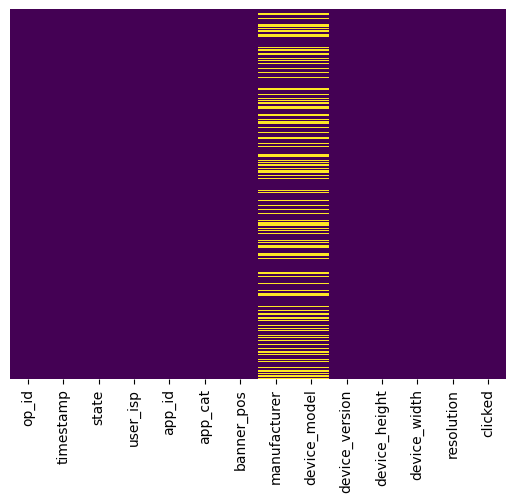

In [333]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [334]:
df_train.isnull().sum()

op_id                 0
timestamp             0
state                 0
user_isp              0
app_id                0
app_cat               0
banner_pos            0
manufacturer      61213
device_model      61204
device_version        0
device_height         0
device_width          0
resolution            0
clicked               0
dtype: int64

In [335]:
df_train.nunique()

op_id             199998
timestamp         195222
state                 51
user_isp            1616
app_id              7798
app_cat               44
banner_pos             9
manufacturer         130
device_model        1201
device_version        11
device_height        186
device_width         140
resolution             1
clicked                2
dtype: int64

## Removing undesired columns

#### We can see that the resolution column has only one value, so it won't help the model for further classification

In [336]:
df_train=df_train.drop(columns=['resolution'])


C:\Users\liork\AppData\Local\Temp\ipykernel_27684\3782643361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap='coolwarm')


Text(0.5, 1.0, 'new_data correlation')

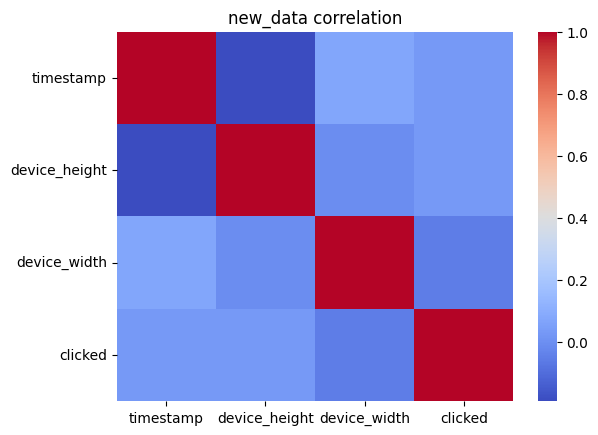

In [337]:
sns.heatmap(df_train.corr(),cmap='coolwarm')
plt.title('new_data correlation')

In [338]:
!pip install Jinja2

In [339]:
df_train.isnull().sum()

op_id                 0
timestamp             0
state                 0
user_isp              0
app_id                0
app_cat               0
banner_pos            0
manufacturer      61213
device_model      61204
device_version        0
device_height         0
device_width          0
clicked               0
dtype: int64

## Checking for imbalancing

In [387]:
### It is important to balance the dataset, but do it at the end- after all of the preprocessing and after completeion of nulls

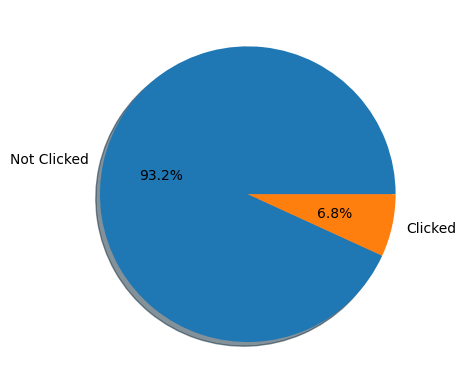

In [340]:
y=df_train.clicked.value_counts()
mylabels = ["Not Clicked","Clicked"]
plt.pie(y, labels = mylabels,autopct='%1.1f%%', shadow = True)
plt.show()

#### We can see that the dataset is not balanced at all, about 93% of the data has a False label

## Creating boxplots per feature

In [341]:
df_train.state.unique()

array(['North Carolina', 'Maryland', 'Iowa', 'Florida', 'California',
       'Minnesota', 'Nevada', 'Louisiana', 'Illinois', 'Texas',
       'New York', 'Pennsylvania', 'Massachusetts', 'South Carolina',
       'Indiana', 'Missouri', 'Georgia', 'North Dakota', 'Colorado',
       'New Mexico', 'Ohio', 'Tennessee', 'Alabama', 'Michigan',
       'Mississippi', 'Oklahoma', 'Arizona', 'Nebraska', 'Virginia',
       'Connecticut', 'Oregon', 'District of Columbia', 'Kentucky',
       'New Jersey', 'Delaware', 'Washington', 'Arkansas', 'Kansas',
       'Idaho', 'Alaska', 'Maine', 'West Virginia', 'Wisconsin',
       'Rhode Island', 'South Dakota', 'New Hampshire', 'Utah', 'Hawaii',
       'Montana', 'Wyoming', 'Vermont'], dtype=object)

In [342]:
df_train.app_cat.unique()

array(['games - racing', 'unknown', 'games - music', 'games - casino',
       'games - card', 'games - educational', 'games - board',
       'games - arcade', 'games - sports', 'games - word', 'education',
       'games - action', 'games - puzzle', 'games - simulation',
       'games - casual', 'games - adventure', 'games - role_playing',
       'auto_and_vehicles', 'sports', 'social', 'productivity',
       'games - strategy', 'entertainment', 'music_and_audio',
       'libraries_and_demo', 'health_and_fitness', 'personalization',
       'games - trivia', 'tools', 'art_and_design', 'comics', 'shopping',
       'books_and_reference', 'food_and_drink', 'beauty', 'photography',
       'dating', 'video_players', 'weather', 'finance', 'business',
       'news_and_magazines', 'lifestyle', 'communication'], dtype=object)

In [343]:
df_train['clicked_numeric']=df_train.clicked*1


AxesSubplot(0.125,0.11;0.775x0.77)


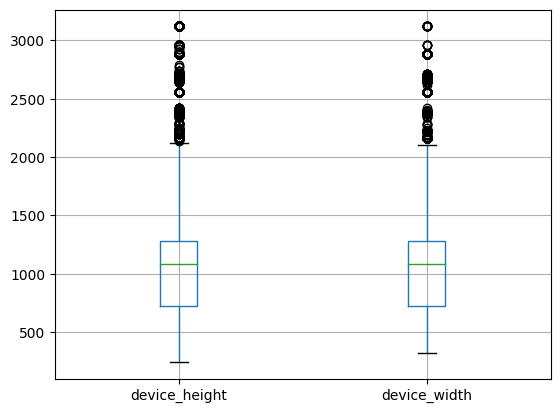

In [344]:
boxplot = df_train.boxplot(column=list(df_train.columns[df_train.dtypes=='int64'][1:]))  
print(boxplot)

In [345]:
table = pd.pivot_table(df_train, values=['clicked_numeric','clicked'], index=['manufacturer', 'device_model'],
                    aggfunc={'clicked_numeric': np.sum, 'clicked':np.size}).sort_values(by=['clicked_numeric'],ascending=False)
table=table.rename(columns={"clicked": "total", "clicked_numeric": "clicked"})
table['ratio clicked']=100*table.clicked/table.total
table

total  clicked  ratio clicked
manufacturer device_model                               
LG           LM-X210(G)     6989      563       8.055516
             MP260          5005      514      10.269730
Motorola     Moto E4        5576      502       9.002869
Samsung      SM-J327T1      6621      354       5.346624
LG           MS210          2904      306      10.537190
...                          ...      ...            ...
Lenovo       K33A42            2        0       0.000000
             K53a48            1        0       0.000000
             K8 Note           1        0       0.000000
             PB2-650M          1        0       0.000000
verykool     s5028             1        0       0.000000

[1201 rows x 3 columns]

In [346]:
df_train.timestamp=df_train.timestamp.apply(dt.datetime.fromtimestamp)


## convert timestamp to day and month columns 

In [347]:
df_train["month"]=df_train.timestamp.apply(lambda x: x.month)
df_train["day"]=df_train.timestamp.apply(lambda x: x.day)
df_train["hour"]=df_train.timestamp.apply(lambda x: x.hour)




### Discretization of the time of day

In [348]:
def return_interval(x):
    if x in np.arange(6,12):
        return 'morning'
    elif x in np.arange(12,18):
        return 'noon'
    else:
        return 'evening'
df_train["interval of day"]=df_train.hour.apply(return_interval)


## The relaitonship between interval of day and No. of clicked ads

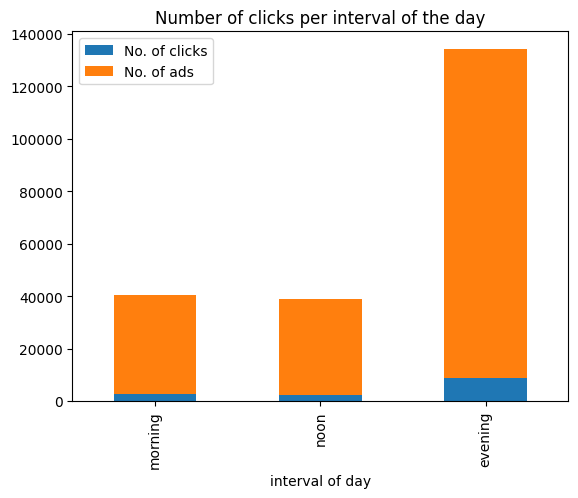

In [349]:
df_clicked_by_month_day=df_train[['clicked_numeric','interval of day']].groupby(by=['interval of day']).agg({'clicked_numeric':['sum','count']})
#print(df_clicked_by_month_day.head())
df_clicked_by_month_day=df_clicked_by_month_day.droplevel(0,axis=1)
interval_order = ["morning", "noon", "evening"]
df_clicked_by_month_day.rename(columns={'sum':'No. of clicks','count':'No. of ads'},inplace=True) 
df_clicked_by_month_day.loc[interval_order].plot.bar(stacked=True)
plt.title("Number of clicks per interval of the day")
plt.show()



#### note: We can clearly see that users tend to click on ads as the day progresses and is effected by the number of adds overall


## Find precent of ads clicked by month

In [350]:
df_train.head()

,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,clicked,clicked_numeric,month,day,hour,interval of day
1128517,7148465a-970d-439b-9047-0c8ebde8a1e1,2019-09-06 16:49:44,North Carolina,Spectrum,pdn1eof,games - racing,bottom-left,LG,VS995,7.0,1440,2560,False,0,9,6,16,noon
1781914,6bd364ed-af48-48f2-aefe-ae55dd4a11d8,2019-09-03 08:14:10,Maryland,AT&T Wireless,3sc85qr,unknown,top,NaN,NaN,6.0.1,480,854,True,1,9,3,8,morning
142513,fea31cce-600e-4be0-b4bf-142b7d6f1661,2019-09-17 01:32:22,Iowa,CenturyLink,faf8fmf,unknown,bottom-left,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,False,0,9,17,1,evening
1620979,1ac66d77-c6c3-4420-ab40-e1c32e989982,2019-09-19 21:00:15,North Carolina,Wireless Data Service Provider Corporation,n3hh6ot,games - music,bottom-left,HTC,U11 life,8.1.0,1280,720,False,0,9,19,21,evening
2450218,b77ed50d-6c7b-405c-bfcb-5571f8b8b4ce,2019-09-17 09:03:20,Florida,T-Mobile USA,8ghtfd4,games - casino,center,NaN,NaN,8.1.0,2160,1080,False,0,9,17,9,morning


In [351]:
df=df_train[['month','clicked_numeric']].groupby(by=['month']).agg({'clicked_numeric':['sum','count']})
df[('clicked_numeric',   '%clicked')]=np.round(100*df[('clicked_numeric',   'sum')]/df[('clicked_numeric',   'count')],2)
df

clicked_numeric                
                  sum  count %clicked
month                                
7                  30    643     4.67
8                2709  49061     5.52
9                5200  73086     7.11
10               4526  60196     7.52
11               1193  17012     7.01

#### note: We can see that there is a slight increase of ads clicked in the last 3 months

## plot for seasonality of the days in each month

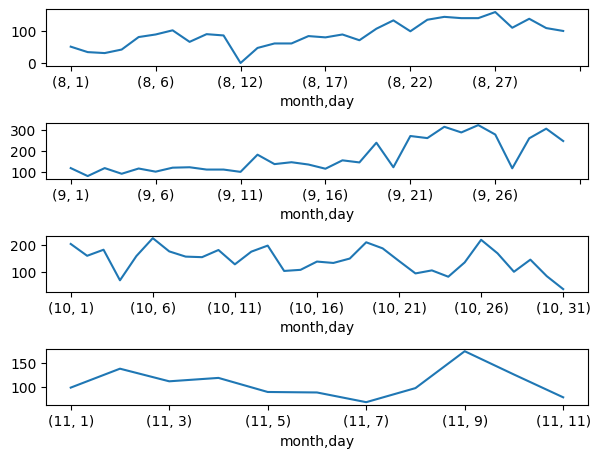

In [352]:
df_clicked_by_month_day=df_train[['day','month','clicked_numeric']].groupby(by=['month','day']).agg({'clicked_numeric':['sum']})
df_list = [df_clicked_by_month_day.loc[(i, slice(None)), :] for i in range(8,12)]
fig, axes = plt.subplots(4)
fig.tight_layout(pad=2.0)
for r in range(4):
    df_list[r].plot(ax=axes[r])
    axes[r].get_legend().remove()



## Check if missibg values of manufacturer and model are always/mostly missing together

<AxesSubplot: >

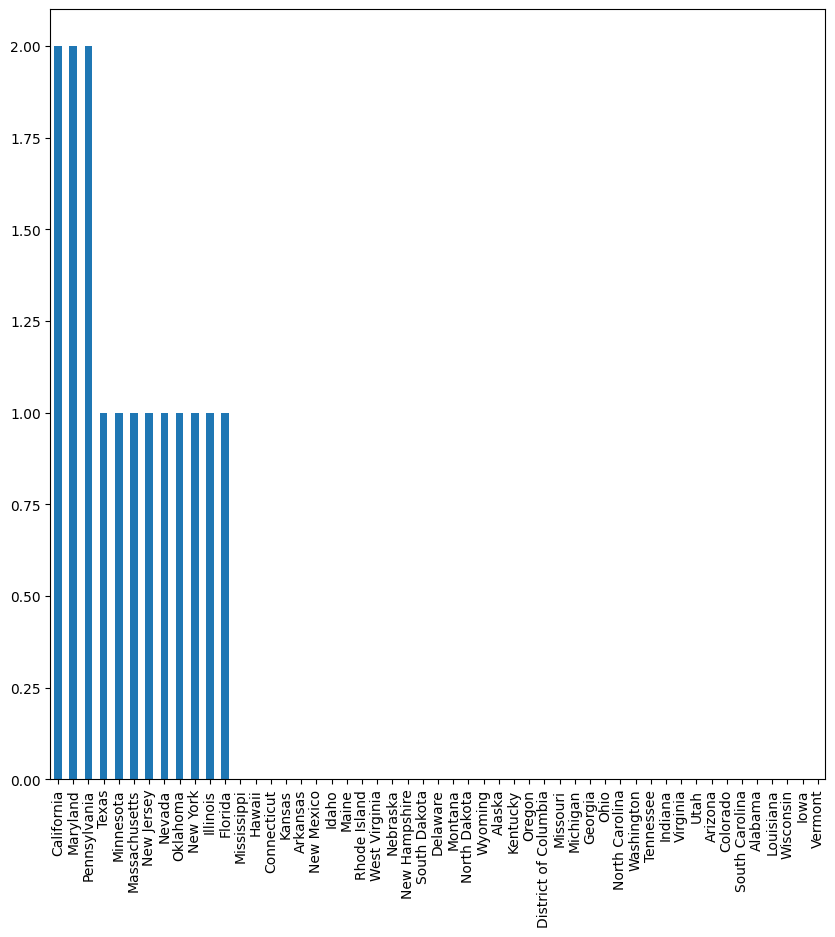

In [353]:
df_diff=df_train[df_train.device_model.isnull() | df_train.manufacturer.isnull()].state.value_counts()-df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].state.value_counts()
df_diff=df_diff.sort_values(ascending=False)
df_diff.plot.bar(figsize=(10,10))



#### Note: We can see that at most cases, they are indeed missing together since the maximum value of the y axis is very small

## Proportion of NULL'S by state


<AxesSubplot: >

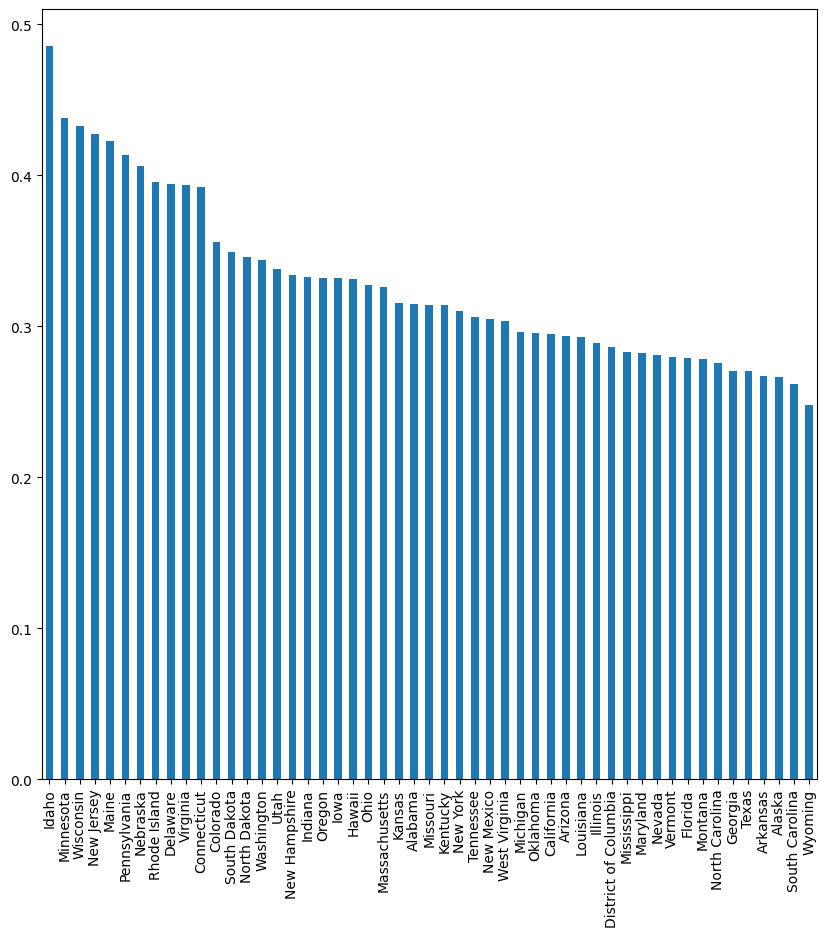

In [354]:
df_diff=(df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].state.value_counts())/df_train.state.value_counts()
df_diff=df_diff.sort_values(ascending=False)
df_diff.plot.bar(figsize=(10,10))


##### Note: <br> Columns with higher height represents states with higher null values proportion, <br> The Data for a combination of device type and device model is not quite missing completely at random, <br> since we can see that the disturbution above is not somewhat uniform for all states, <br> Which means that if we will drop nulls we can prehaps create a bias in our dataset and lose information from some cities <br>

## West/East Coast partition

In [355]:
ecoast=['New Jersey','Illinois','Georgia','Virginia','New York','Florida',
        'Ohio','Tennessee','Alabama','Massachusetts','Pennsylvania','Washington',
       'North Carolina','Mississippi','Louisiana','Rhode Island','Arizona',
        'Kentucky','Maryland','South Carolina','Connecticut','West Virginia',
        'Vermont','District of Columbia','Delaware','New Hampshire','Maine']
wcoast=['California','Oregon','Hawaii','Colorado','Utah','Nevada','Montana',
        'New Mexico','Wyoming','Idaho','Alaska']
middle=['Minnesota','Texas','Missouri','Oklahoma','Arkansas',
        'Indiana','South Dakota','Wisconsin','Iowa','Kansas','Nebraska','North Dakota']
all_states=set(ecoast).union(set(wcoast))-set(df_train["state"].unique())
if not all_states:
    print("All cities covered")



All cities covered


In [356]:
def city_to_coast(x):
    if x in wcoast:
        return "westcoast"
    elif x in ecoast:
        return "eastcoast"
    elif x in wcoast:
        return "middle"
    else:
        return "unmapped"

df_train["coast"]=df_train["state"].apply(city_to_coast)

coast
eastcoast    111429
unmapped      52384
westcoast     36185
Name: clicked_numeric, dtype: int64


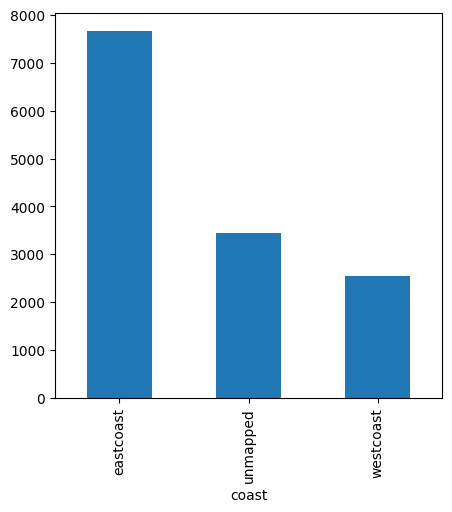

In [357]:
df_clicks_by_coast = df_train.groupby(['coast'])['clicked_numeric'].sum()
df_clicks_by_coast.plot.bar(figsize=(5,5))
df_ads_by_coast = df_train.groupby(['coast'])['clicked_numeric'].count()
print(df_ads_by_coast)

<AxesSubplot: >

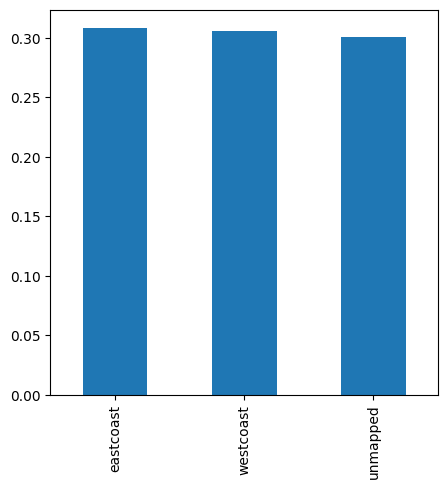

In [358]:
df_diff1=(df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].coast.value_counts()/df_train.coast.value_counts()).sort_values(ascending=False)
df_diff1.plot.bar(figsize=(5,5))

#### We can see that the amount of nulls is about the same for each coast in the states

In [359]:
print(f"The number of unique maunfacturers is {df_train.manufacturer.nunique()}")
print(f"The number of unique models is {df_train.device_model.nunique()}")
print(f"The number of unique op_id is {df_train.op_id.nunique()}")


The number of unique maunfacturers is 130
The number of unique models is 1201
The number of unique op_id is 199998


#### Since we have a lot of op_ids we will drop the op_id column

In [360]:
df_train.drop(["op_id"],inplace=True,axis=1)
df_train.head()

,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,clicked,clicked_numeric,month,day,hour,interval of day,coast
1128517,2019-09-06 16:49:44,North Carolina,Spectrum,pdn1eof,games - racing,bottom-left,LG,VS995,7.0,1440,2560,False,0,9,6,16,noon,eastcoast
1781914,2019-09-03 08:14:10,Maryland,AT&T Wireless,3sc85qr,unknown,top,NaN,NaN,6.0.1,480,854,True,1,9,3,8,morning,eastcoast
142513,2019-09-17 01:32:22,Iowa,CenturyLink,faf8fmf,unknown,bottom-left,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,False,0,9,17,1,evening,unmapped
1620979,2019-09-19 21:00:15,North Carolina,Wireless Data Service Provider Corporation,n3hh6ot,games - music,bottom-left,HTC,U11 life,8.1.0,1280,720,False,0,9,19,21,evening,eastcoast
2450218,2019-09-17 09:03:20,Florida,T-Mobile USA,8ghtfd4,games - casino,center,NaN,NaN,8.1.0,2160,1080,False,0,9,17,9,morning,eastcoast


#### Converting the device version to numerical value

In [361]:
def convert_to_float(x):
    try:
        if len(x)>3:
            return float(x[:3])
        else:
            return float(x[0])
    except ValueError:
        return 0
    
df_train.device_version=df_train.device_version.apply(convert_to_float)
df_train_stats=df_train

## Calculate correlation <br> 
#### * For nominal values: Cramers V <br> * For numerical values: Pearson correlation <br> * For nominal-numerical values: Correlation ratio

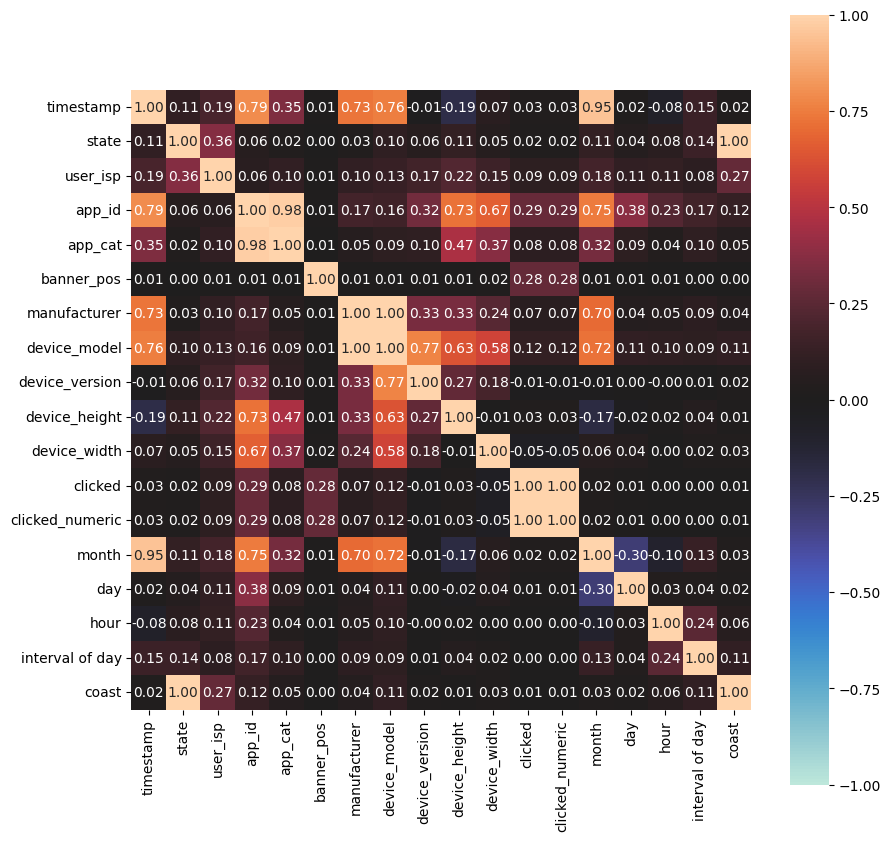

C:\Users\liork\AppData\Local\Temp\ipykernel_27684\1772734868.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,clicked,clicked_numeric,month,day,hour,interval of day,coast
timestamp,1.00,0.11,0.19,0.79,0.35,0.01,0.73,0.76,-0.01,-0.19,0.07,0.03,0.03,0.95,0.02,-0.08,0.15,0.02
state,0.11,1.00,0.36,0.06,0.02,0.00,0.03,0.10,0.06,0.11,0.05,0.02,0.02,0.11,0.04,0.08,0.14,1.00
user_isp,0.19,0.36,1.00,0.06,0.10,0.01,0.10,0.13,0.17,0.22,0.15,0.09,0.09,0.18,0.11,0.11,0.08,0.27
app_id,0.79,0.06,0.06,1.00,0.98,0.01,0.17,0.16,0.32,0.73,0.67,0.29,0.29,0.75,0.38,0.23,0.17,0.12
app_cat,0.35,0.02,0.10,0.98,1.00,0.01,0.05,0.09,0.10,0.47,0.37,0.08,0.08,0.32,0.09,0.04,0.10,0.05
banner_pos,0.01,0.00,0.01,0.01,0.01,1.00,0.01,0.01,0.01,0.01,0.02,0.28,0.28,0.01,0.01,0.01,0.00,0.00
manufacturer,0.73,0.03,0.10,0.17,0.05,0.01,1.00,1.00,0.33,0.33,0.24,0.07,0.07,0.70,0.04,0.05,0.09,0.04
device_model,0.76,0.10,0.13,0.16,0.09,0.01,1.00,1.00,0.77,0.63,0.58,0.12,0.12,0.72,0.11,0.10,0.09,0.11
device_version,-0.01,0.06,0.17,0.32,0.10,0.01,0.33,0.77,1.00,0.27,0.18,-0.01,-0.01,-0.01,0.00,-0.00,0.01,0.02
device_height,-0.19,0.11,0.22,0.73,0.47,0.01,0.33,0.63,0.27,1.00,-0.01,0.03,0.03,-0.17,-0.02,0.02,0.04,0.01


In [362]:
complete_correlation= associations(df_train_stats, filename= 'complete_correlation.png', figsize=(10,10),nom_nom_assoc='cramer')
df_complete_corr=complete_correlation['corr']
df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


## Completing NULL values fo device manufacturer via applying KNN

In [363]:
df_train_manu=df_train[df_train.manufacturer.notnull()]
df_test_manu=df_train[df_train.manufacturer.isnull()]

In [364]:
X_train, X_val, y_train, y_val = train_test_split(df_train_manu[['device_version','device_height','device_width','clicked_numeric','month','day','hour']], df_train_manu['manufacturer'], test_size=0.33, random_state=42)

In [365]:
X_train, X_val, y_train, y_val = train_test_split(df_train_manu.select_dtypes(include=np.number), df_train_manu['manufacturer'], test_size=0.33, random_state=42)

100%|██████████| 9/9 [00:23<00:00,  2.65s/it]


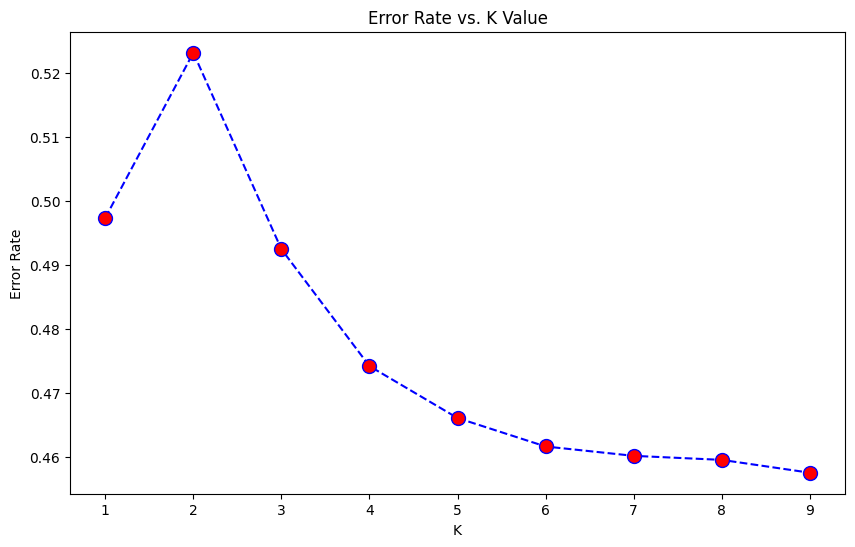

In [366]:
error_rate = []

# Will take some time
for i in tqdm(range(1,10)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [367]:
print(f"If we will guess the most common category we will be right on {np.round(100*df_train.manufacturer.value_counts().iloc[0]/df_train.shape[0],2)} % of the cases, so KNN is better")

If we will guess the most common category we will be right on 27.33 % of the cases, so KNN is better


### Train/Test split the entire data

In [368]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(['clicked','clicked_numeric'],axis=1),df_train['clicked'], test_size=0.33, random_state=42)
X_train["clicked"]=y_train
X_val["clicked"]=y_val


### Predict manufacturer 

In [ ]:
df_train_manu=X_train[X_train.manufacturer.notnull()] #in order to train a model and predict the manufacturere
df_train_manu_predict=X_train[X_train.manufacturer.isnull()] #data that needs to be predicted
df_test_manu=X_val[X_val.manufacturer.notnull()]
df_test_manu_predict=X_val[X_val.manufacturer.isnull()]

In [386]:
def fit_predict_knn(df_fit,df_predict):
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(df_fit.select_dtypes(include=np.number),df_fit['manufacturer'])
    df_predict.manufacturer=knn.predict(df_predict.select_dtypes(include=np.number))
    return pd.concat([df_fit,df_predict])


In [384]:
df_train=fit_predict_knn(df_train_manu,df_train_manu_predict)
df_val=fit_predict_knn(pd.concat([df_test_manu,df_train_manu]),pd.concat([df_test_manu_predict,df_train_manu_predict]))
#in the line above we use data from both training and validation to train the model since in production we will have this information as well
y_train=df_train["clicked"]
y_val=df_val["clicked"]
X_train=df_train.drop(["clicked"],axis=1)
X_val=df_val.drop(["clicked"],axis=1)

In [385]:
df_train.isnull().sum()

timestamp              0
state                  0
user_isp               0
app_id                 0
app_cat                0
banner_pos             0
manufacturer           0
device_model       41004
device_version         0
device_height          0
device_width           0
month                  0
day                    0
hour                   0
interval of day        0
coast                  0
clicked                0
dtype: int64

In [380]:
#Encoding should be done !!!before!!! the split to train and test!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_train.timestamp=X_train.timestamp.astype(str)
features_to_encode = list(X_train.select_dtypes(include = ['object']).columns)
print(features_to_encode)

#Should Encode the following: banner_pos, interval of day, coast



['timestamp', 'state', 'user_isp', 'app_id', 'app_cat', 'banner_pos', 'manufacturer', 'device_model', 'interval of day', 'coast']
